<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compartments" data-toc-modified-id="Compartments-1">Compartments</a></span><ul class="toc-item"><li><span><a href="#Mouse-B-cells" data-toc-modified-id="Mouse-B-cells-1.1">Mouse B cells</a></span></li><li><span><a href="#Mouse-iPS-cells" data-toc-modified-id="Mouse-iPS-cells-1.2">Mouse iPS cells</a></span></li><li><span><a href="#Compare" data-toc-modified-id="Compare-1.3">Compare</a></span><ul class="toc-item"><li><span><a href="#Spot-changes-in-activity" data-toc-modified-id="Spot-changes-in-activity-1.3.1">Spot changes in activity</a></span></li><li><span><a href="#Correlate-eigenvectors" data-toc-modified-id="Correlate-eigenvectors-1.3.2">Correlate eigenvectors</a></span></li></ul></li></ul></li><li><span><a href="#TADs" data-toc-modified-id="TADs-2">TADs</a></span><ul class="toc-item"><li><span><a href="#TAD-caller-algorithms" data-toc-modified-id="TAD-caller-algorithms-2.1">TAD caller algorithms</a></span><ul class="toc-item"><li><span><a href="#TADbit" data-toc-modified-id="TADbit-2.1.1">TADbit</a></span></li><li><span><a href="#TopDom" data-toc-modified-id="TopDom-2.1.2">TopDom</a></span></li><li><span><a href="#Insulation-score" data-toc-modified-id="Insulation-score-2.1.3">Insulation score</a></span></li></ul></li><li><span><a href="#Comparison-of-TAD-borders" data-toc-modified-id="Comparison-of-TAD-borders-2.2">Comparison of TAD borders</a></span><ul class="toc-item"><li><span><a href="#Statistical-significance-of-the-TAD-borders-alignments" data-toc-modified-id="Statistical-significance-of-the-TAD-borders-alignments-2.2.1">Statistical significance of the TAD borders alignments</a></span></li></ul></li><li><span><a href="#Save-Chromosome-object-(with-TAD-definition)" data-toc-modified-id="Save-Chromosome-object-(with-TAD-definition)-2.3">Save Chromosome object (with TAD definition)</a></span></li><li><span><a href="#Extra:-choosing-the-best-resolution-to-call-TAD-borders" data-toc-modified-id="Extra:-choosing-the-best-resolution-to-call-TAD-borders-2.4">Extra: choosing the best resolution to call TAD borders</a></span></li></ul></li></ul></div>

# Compartments

<img src="images/compartments_and_tads.png">

Here, we present the analysis to detect the compartments in Mouse B and iPS cells. In this example, we will use the GC-content (guanine-cytosine content) to identify which bins belong to the A or B compartments. The percentage of bases that are either guanine or cytosine on a DNA strand correlates directly with gene density and is a good measure to identify open and close chromatine.

*__Note__: Compartments are detected on the full genome matrix.*

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_bam
from pytadbit.parsers.genome_parser import get_gc_content, parse_fasta
from cPickle import load

In [2]:
reso = 200000
base_path = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'
bias_path = 'results/fragment/{0}_both/04_normalizing/biases_{0}_both_{1}kb.biases'

In [3]:
rich_in_A = get_gc_content(parse_fasta('genome/Mus_musculus-GRCm38.p6/Mus_musculus-GRCm38.p6.fa'), 
                           by_chrom=True ,resolution=reso, n_cpus=8)

Loading cached genome


## Mouse B cells

In [4]:
cell   = 'mouse_B'

In [5]:
hic_data = load_hic_data_from_bam(base_path.format(cell),
                                  resolution=reso,
                                  biases=bias_path.format(cell, reso / 1000),
                                  ncpus=8)


  (Matrix size 13641x13641)                                                    [2018-10-11 11:30:12]

  - Parsing BAM (122 chunks)                                                   [2018-10-11 11:30:12]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-11 11:33:14]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122



In [6]:
! mkdir -p results/fragment/$cell\_both/05_segmenting

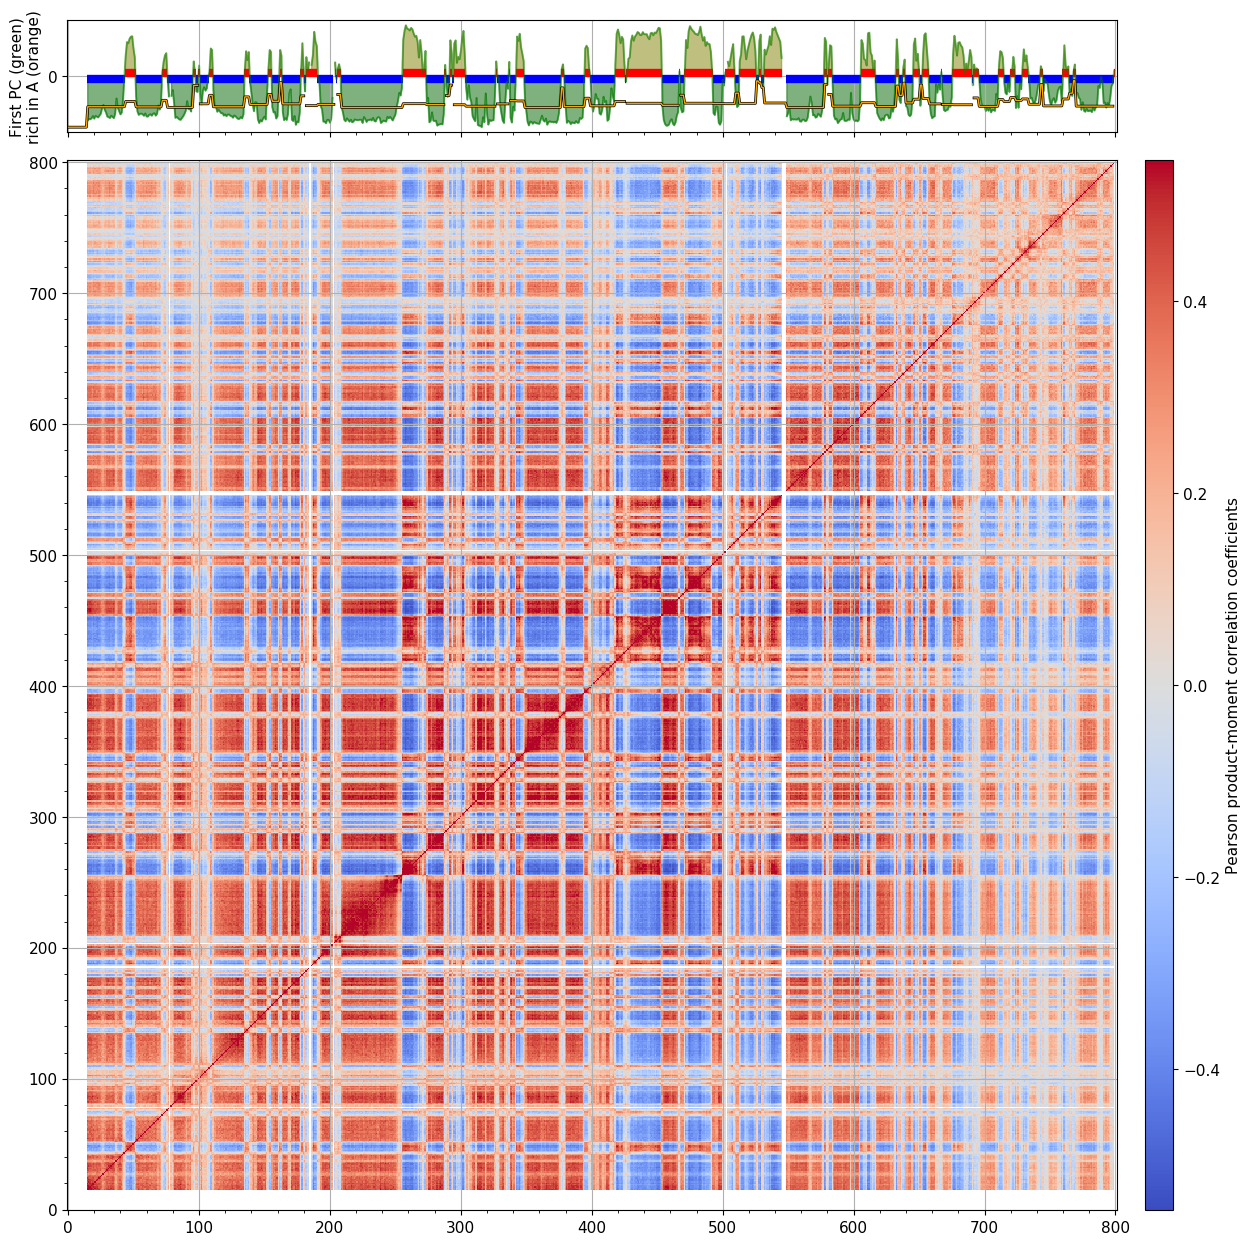

In [8]:
crm = 'chr3'
corr = hic_data.find_compartments(show_compartment_labels=True,
        show=True, crms=[crm], vmin='auto', vmax='auto', rich_in_A=rich_in_A, 
        savedata='results/fragment/{0}_both/05_segmenting/compartments_{1}_{2}.tsv'.format(cell, crm, reso),
        savedir='results/fragment/{0}_both/05_segmenting/eigenvectors_{1}_{2}'.format(cell, crm, reso))

## Mouse iPS cells

In [9]:
cell   = 'mouse_PSC'

In [10]:
hic_data = load_hic_data_from_bam(base_path.format(cell),
                                  resolution=reso,
                                  biases=bias_path.format(cell, reso / 1000),
                                  ncpus=8)


  (Matrix size 13641x13641)                                                    [2018-10-11 11:43:44]

  - Parsing BAM (122 chunks)                                                   [2018-10-11 11:43:45]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122

  - Getting matrices                                                           [2018-10-11 11:48:20]
     .......... .......... .......... .......... ..........     50/122
     .......... .......... .......... .......... ..........    100/122
     .......... .......... ..                                  122/122



In [11]:
! mkdir -p results/fragment/$cell\_both/05_segmenting

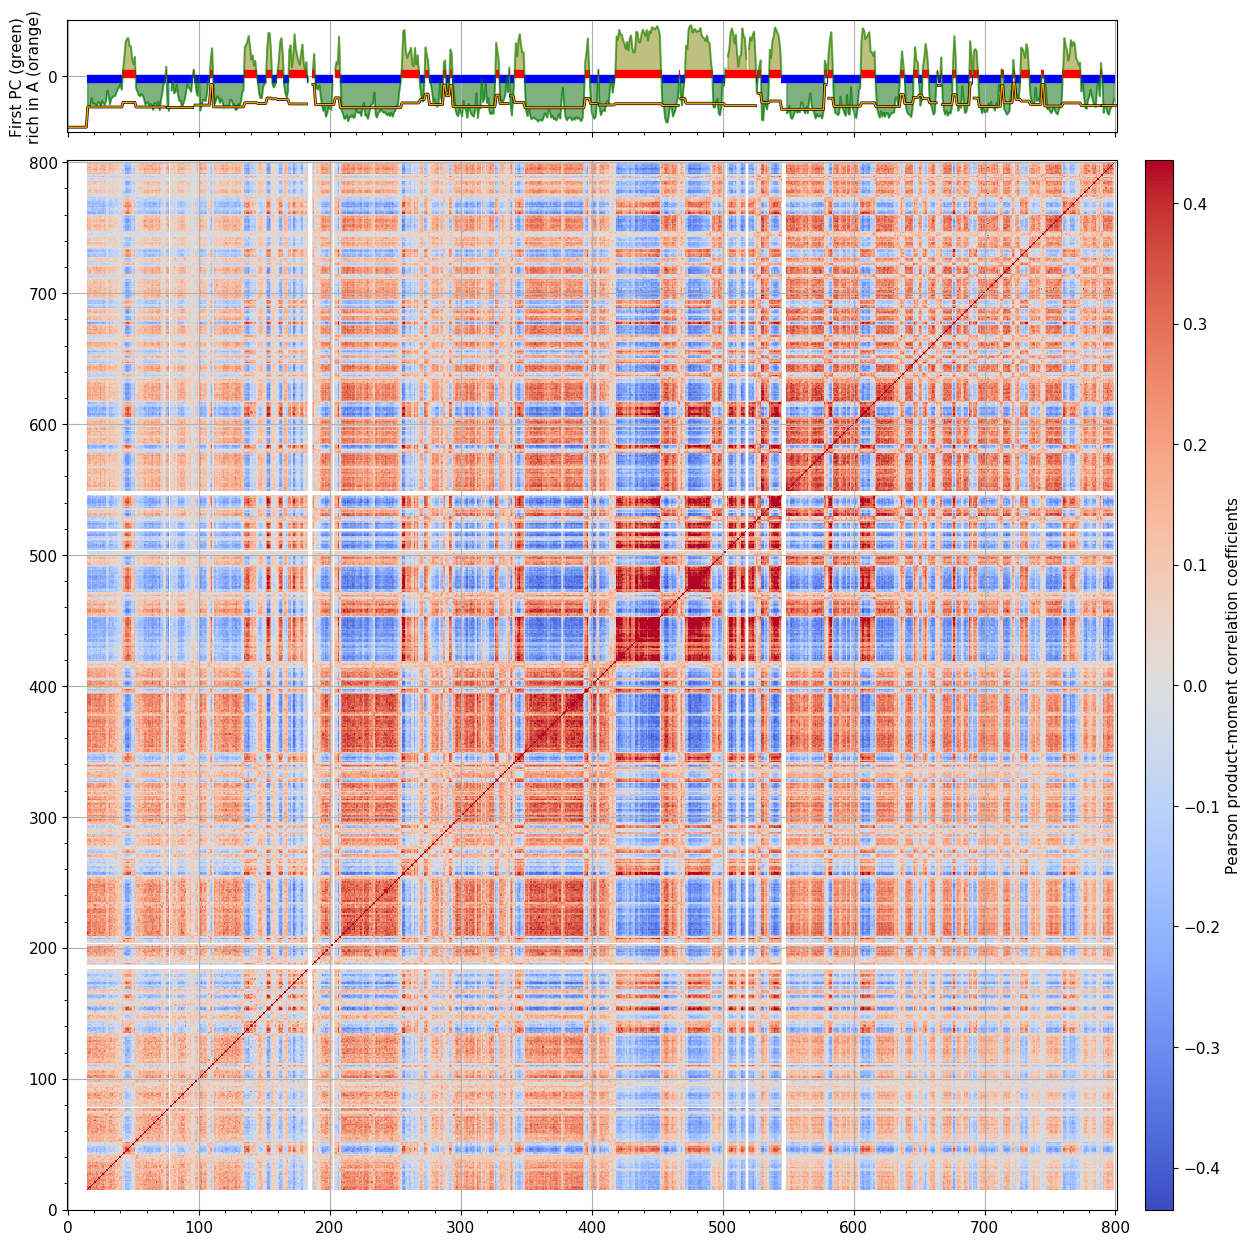

In [18]:
crm = 'chr3'
corr = hic_data.find_compartments(show_compartment_labels=True,
        show=True, crms=[crm], vmin='auto', vmax='auto', rich_in_A=rich_in_A,
        savedata='results/fragment/{0}_both/05_segmenting/compartments_{1}_{2}.tsv'.format(cell, crm, reso),
        savedir='results/fragment/{0}_both/05_segmenting/eigenvectors_{1}_{2}'.format(cell, crm, reso))

## Compare

The assignments of the compartments for the two cell types are stored in two different files:

In [13]:
! head -n 20 results/fragment/mouse_B_both/05_segmenting/compartments_chr3_200000.tsv

## CHR chr3	Eigenvector: 1
#	start	end	rich in A	type
chr3	16	44	0.40	B
chr3	45	52	0.50	A
chr3	53	72	0.40	B
chr3	73	76	0.53	A
chr3	77	96	0.39	B
chr3	97	98	0.82	A
chr3	99	100	0.82	B
chr3	101	101	nan	A
chr3	102	108	0.46	B
chr3	109	111	0.62	A
chr3	112	135	0.40	B
chr3	136	139	0.59	A
chr3	140	153	0.44	B
chr3	154	156	0.64	A
chr3	157	162	0.51	B
chr3	163	164	0.87	A
chr3	165	178	0.46	B
chr3	179	181	0.61	A


In [14]:
! head -n 20 results/fragment/mouse_PSC_both/05_segmenting/compartments_chr3_200000.tsv

## CHR chr3	Eigenvector: 1
#	start	end	rich in A	type
chr3	16	42	0.40	B
chr3	43	52	0.49	A
chr3	53	75	0.40	B
chr3	76	76	nan	A
chr3	77	96	0.39	B
chr3	97	97	nan	A
chr3	98	109	0.43	B
chr3	110	111	0.84	A
chr3	112	135	0.40	B
chr3	136	145	0.48	A
chr3	146	152	0.47	B
chr3	153	156	0.57	A
chr3	157	160	0.56	B
chr3	161	165	0.54	A
chr3	166	169	0.54	B
chr3	170	183	0.46	A
chr3	184	184	nan	B
chr3	188	189	0.84	A


In another folder, we also saved the coordinates of each computed eigenvector:

In [13]:
! ls -lh results/fragment/mouse_B_both/05_segmenting/eigenvectors_chr3_200000

total 52K
-rw-r--r-- 1 systemd-network users 49K oct 11 11:43 chr3_EigVect1.tsv


*__Note__: In this file the first line shows the eigenvector index with it's corresponding eigenvalue (the first column should always be the one you selected, even if it is not the first eigenvector).*

Then there are the coordinates of the eigenvectors. In the first column, the coordinates correspond to the assignment of the A and B compartments, positive values for A compartments and negative values for B compartments.

In [14]:
! head -n 20 results/fragment/mouse_B_both/05_segmenting/eigenvectors_chr3_200000/chr3_EigVect1.tsv

# EV_1 (199.3674)	EV_2 (38.9365)	EV_3 (22.7067)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.047058774338678624	-0.0008416946845418646	0.041851430073603285
-0.04570124930041133	-0.00491013140668968	0.038322756862219455
-0.045914264537434225	-0.002039448345766831	0.03596787271950662
-0.04485768885458887	-0.003962351416821032	0.0423027589274437


Load eigenvectors coordinates from files:

In [1]:
fh = open('results/fragment/mouse_B_both/05_segmenting/eigenvectors_chr3_200000/chr3_EigVect1.tsv')

header = fh.next()

ev1_B = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_B.append(float(evc1))
    
fh = open('results/fragment/mouse_PSC_both/05_segmenting/eigenvectors_chr3_200000/chr3_EigVect1.tsv')

header = fh.next()

ev1_PSC = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_PSC.append(float(evc1))
    
diff = []
for i in range(len(ev1_B)):
    diff.append(ev1_B[i] - ev1_PSC[i])

### Spot changes in activity

Plot the difference between each eigenvector along chromosome

In [2]:
from matplotlib import pyplot as plt

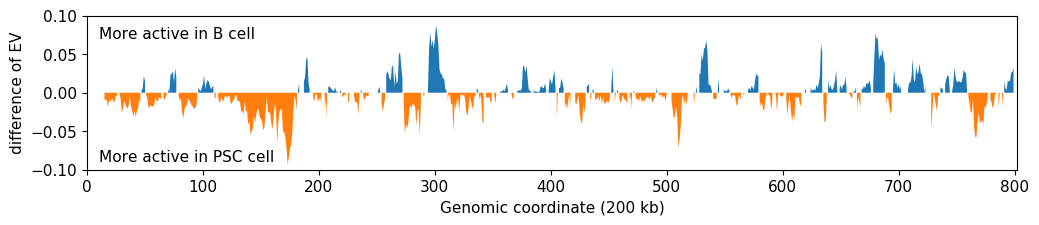

In [9]:
plt.figure(figsize=(12, 2))
plt.text(10, 0.07, 'More active in B cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i>0 for i in diff])
plt.text(10, -0.09, 'More active in PSC cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i<0 for i in diff])
plt.xlim(0, len(diff))
plt.ylim(-0.1, 0.1)
plt.ylabel('difference of EV')
_ = plt.xlabel('Genomic coordinate (%s kb)' % (reso / 1000))

### Correlate eigenvectors

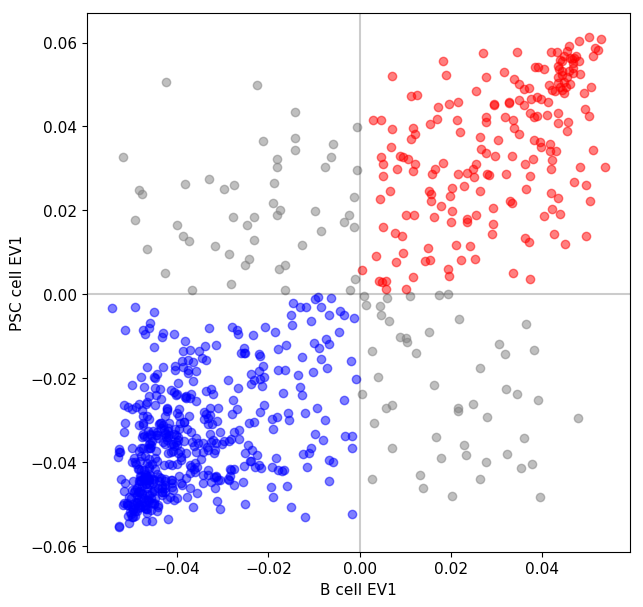

In [10]:
plt.figure(figsize=(6, 6))
for i in range(len(ev1_B)):
    if ev1_B[i] > 0 and ev1_PSC[i] > 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'ro', alpha=0.5)
    elif ev1_B[i] < 0 and ev1_PSC[i] < 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'bo', alpha=0.5)
    else:
        plt.plot(ev1_B[i], ev1_PSC[i], 'o', color='grey', alpha=0.5)
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)
plt.xlabel('B cell EV1')
_ = plt.ylabel('PSC cell EV1')

# TADs

Now, we move to the TADs detection. In this notebook we will detect TAD borders at 100kbp resolution. 

<!-- The comparison of TAD borders at high resolutions becomes difficult because the border positions are not as sharply defined as at lower resolutions.

An example of consistency between TAD borders is shown in the following graph. TAD borders are called at 1 kb resolution (insulation score-based method). We assume that there should be a high ratio of conservation between the 4 replicates and as we see that's true for resolutions lower than approximately 100kbp. If our bin size is for example 50kbp, we only reach the same ratio of consistency if we consider TAD borders found 2 bins away as being the same border in the different replicates.

<img src="images/TAD_calling_resolution.png"> -->

In [3]:
from pytadbit import Chromosome
from pytadbit.parsers.hic_parser import load_hic_data_from_bam

In [4]:
base_path = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'
bias_path = 'results/fragment/{0}_both/04_normalizing/biases_{0}_both_{1}kb.biases'

reso = 100000

cel1 = 'mouse_B'
cel2 = 'mouse_PSC'

In [5]:
hic_data1 = load_hic_data_from_bam(base_path.format(cel1),
                                   resolution=reso,
                                   region='chr3',
                                   biases=bias_path.format(cel1, reso / 1000),
                                   ncpus=8)
hic_data2 = load_hic_data_from_bam(base_path.format(cel2),
                                   resolution=reso,
                                   region='chr3',
                                   biases=bias_path.format(cel2, reso / 1000),
                                   ncpus=8)


  (Matrix size 1601x1601)                                                      [2018-10-17 00:42:22]

  - Parsing BAM (101 chunks)                                                   [2018-10-17 00:42:22]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .                                                         101/101

  - Getting matrices                                                           [2018-10-17 00:42:31]
     .......... .......... .......... .......... ..........     50/101
     .......... .......... .......... .......... ..........    100/101
     .                                                         101/101


  (Matrix size 1601x1601)                                                      [2018-10-17 00:42:42]

  - Parsing BAM (101 chunks)                                                   [2018-10-17 00:42:42]
     .......... .......... .......... .......... ..........    

In [4]:
crm = Chromosome(chrname)
crm.add_experiment('mouse_B',  
                   hic_data=[hic_data1.get_matrix(focus='chr3')],
                   norm_data=[hic_data1.get_matrix(focus='chr3',normalized=True)],
                   resolution=reso)
crm.add_experiment('mouse_PSC', 
                   hic_data=[hic_data2.get_matrix(focus='chr3')],
                   norm_data=[hic_data2.get_matrix(focus='chr3',normalized=True)],
                   resolution=reso)

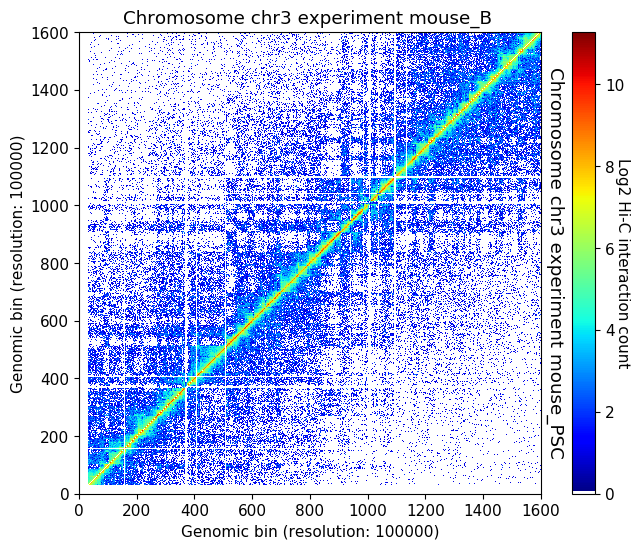

In [5]:
crm.visualize([('mouse_B', 'mouse_PSC')])

## TAD caller algorithms

### TADbit

TADbit is the original TAD caller algorithm TADbit is a breakpoint detection algorithm that returns the optimal segmentation of the chromosome under BIC-penalized likelihood. The model assumes that counts have a Poisson distribution and that the expected value of the counts decreases like a power-law with the linear distance on the chromosome.

In [5]:
crm.find_tad(['mouse_B', 'mouse_PSC'], n_cpus=8)

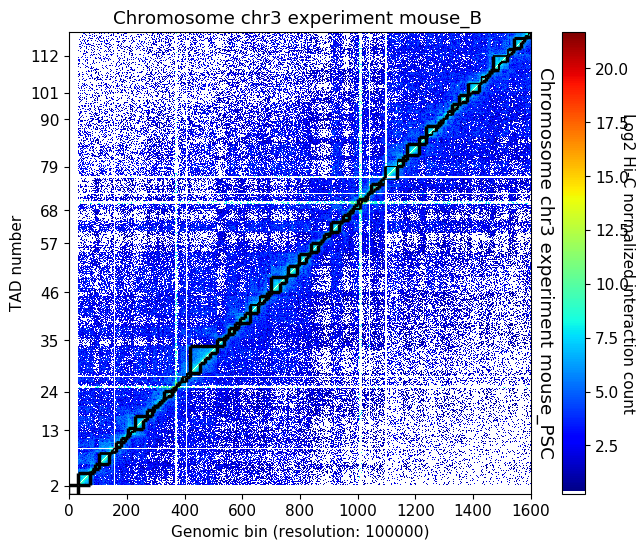

In [6]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True)

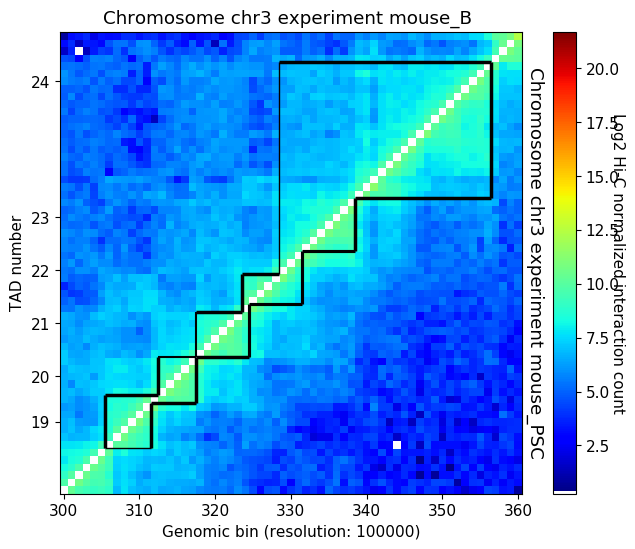

In [7]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True, focus=(300, 360))

In [8]:
B = crm.experiments['mouse_B']
PSC = crm.experiments['mouse_PSC']

In [9]:
crm.experiments

[Experiment mouse_B (resolution: 100 kb, TADs: 96, Hi-C rows: 1601, normalized: visibility),
 Experiment mouse_PSC (resolution: 100 kb, TADs: 118, Hi-C rows: 1601, normalized: visibility)]

### TopDom

TopDom identifies TAD borders based on the assumption that contact frequencies between regions upstream and downstream of a border are lower than those between two regions within a TAD. The algorithm only depends on a single parameter corresponding to the window size. The algorithm provides a measure (from 0 to 10) of confidence on the accuracy of the border detection (https://www.ncbi.nlm.nih.gov/pubmed/26704975).

In [6]:
crm.find_tad(['mouse_B', 'mouse_PSC'], n_cpus=8, use_topdom=True)

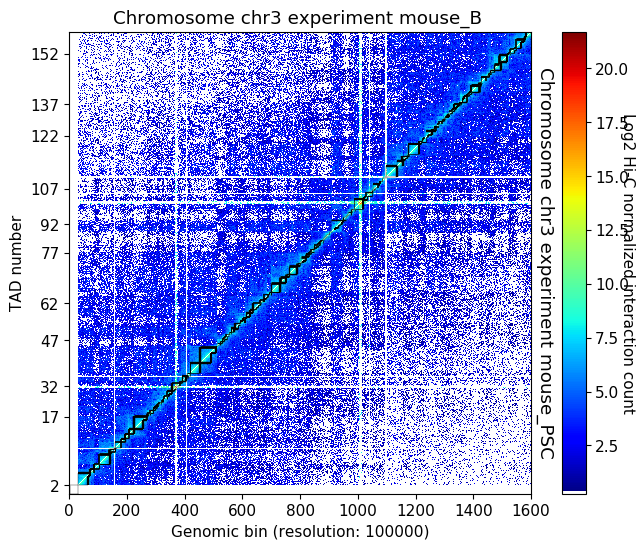

In [7]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True)

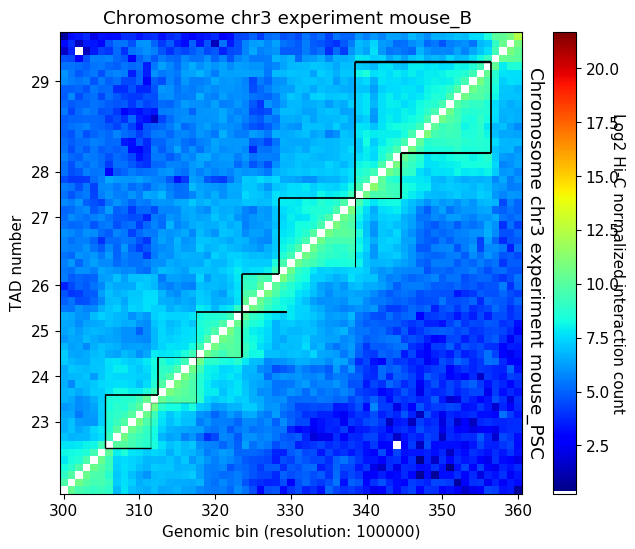

In [8]:
crm.visualize([('mouse_B', 'mouse_PSC')], normalized=True, paint_tads=True, focus=(300, 360))

### Insulation score

Insulation score (Crane et al. 2015 https://doi.org/10.1038/nature14450) can be used to build an insulation profile of the genome and, with a simple transformation, to identify TAD borders.

<img src="images/insulation_score.png">

In [6]:
from pytadbit.tadbit import insulation_score, insulation_to_borders

First we need to normalize the matrices by visibility and by decay:

In [7]:
hic_data1.normalize_hic()
hic_data1.normalize_expected()

hic_data2.normalize_hic()
hic_data2.normalize_expected()

iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 1553.816
  - rescaling biases
iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 1570.990
  - rescaling biases


The two important parameter to define are the window size, the distance from the diagonal and the delta.
 - the square size should be 500 kb as close as possible from the diagonal
 - the delta is to look for increases in insulation around a given bin. Should be around 100 kb (in out case we define it as 200 kb as we are working at 100 kb resolution, and working with only one bin is a bit to little)

In [8]:
wsize = (1, 4)

In [15]:
insc1, delta1 = insulation_score(hic_data1, [wsize], resolution=100000, normalize=True, delta=2)
insc2, delta2 = insulation_score(hic_data2, [wsize], resolution=100000, normalize=True, delta=2)

 - computing insulation in band 1-4
 - computing insulation in band 1-4


Once defined the insulation score and the values of delta can be used to search for borders.

In [18]:
borders1 = insulation_to_borders(insc1[wsize], delta1[wsize], min_strength=0.1)
borders2 = insulation_to_borders(insc2[wsize], delta2[wsize], min_strength=0.1)

Currently the representation is not available in TADbit as for the other methods, but we can easily plot it:

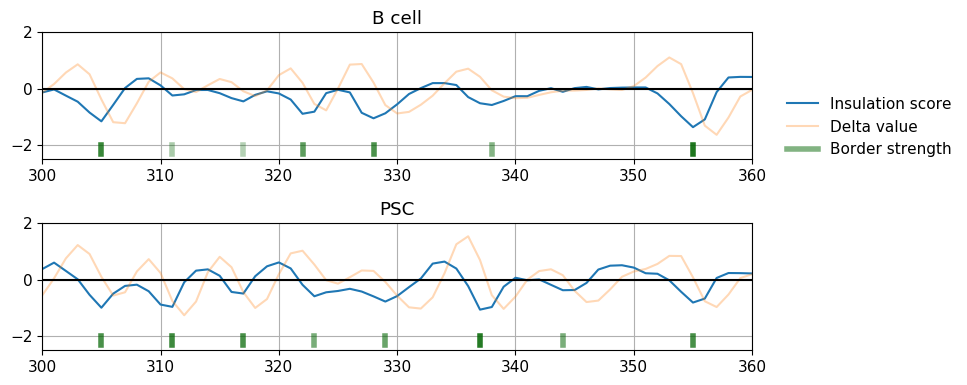

In [19]:
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.title('B cell')
l1 = plt.plot([insc1[(wsize)].get(i, float('nan')) for i in range(max(insc1[(wsize)]))], label='Insulation score')
l2 = plt.plot([delta1[(wsize)].get(i, float('nan')) for i in range(max(insc1[(wsize)]))],
         alpha=0.3, label='Delta value')
for b, c in borders1:
    l3 = plt.plot([b] * 2, [-2, -2.3], color='darkgreen', alpha=c, lw=4, label='Border strength')
    
plt.grid()
plt.axhline(0, color='k')
plt.ylim(-2.5, 2)
plt.xlim(300, 360)

plt.legend(l1 + l2 + l3, [l.get_label() for l in l1 + l2 + l3], frameon=False, bbox_to_anchor=(1.3, 0.6))

plt.subplot(2, 1, 2)
plt.title('PSC')
plt.plot([insc2[(wsize)].get(i, float('nan')) for i in range(max(insc2[(wsize)]))])
plt.plot([delta2[(wsize)].get(i, float('nan')) for i in range(max(insc2[(wsize)]))], alpha=0.3)
for b, c in borders2:
    plt.plot([b] * 2, [-2, -2.3], color='darkgreen', alpha=c, lw=4)
plt.grid()
plt.axhline(0, color='k')
plt.ylim(-2.5, 2)
_ = plt.xlim(300, 360)
plt.tight_layout()

## Comparison of TAD borders

The TAD borders can be aligned, using a simple reciprocal best hit strategy:

In [10]:
ali = crm.align_experiments(['mouse_B', 'mouse_PSC'], max_dist=reso)

In the plots below, each arc represents a TAD. Between two consecutive arcs the triangle mark the border. This triangle is colored depending on the confidence of the TAD border call. 

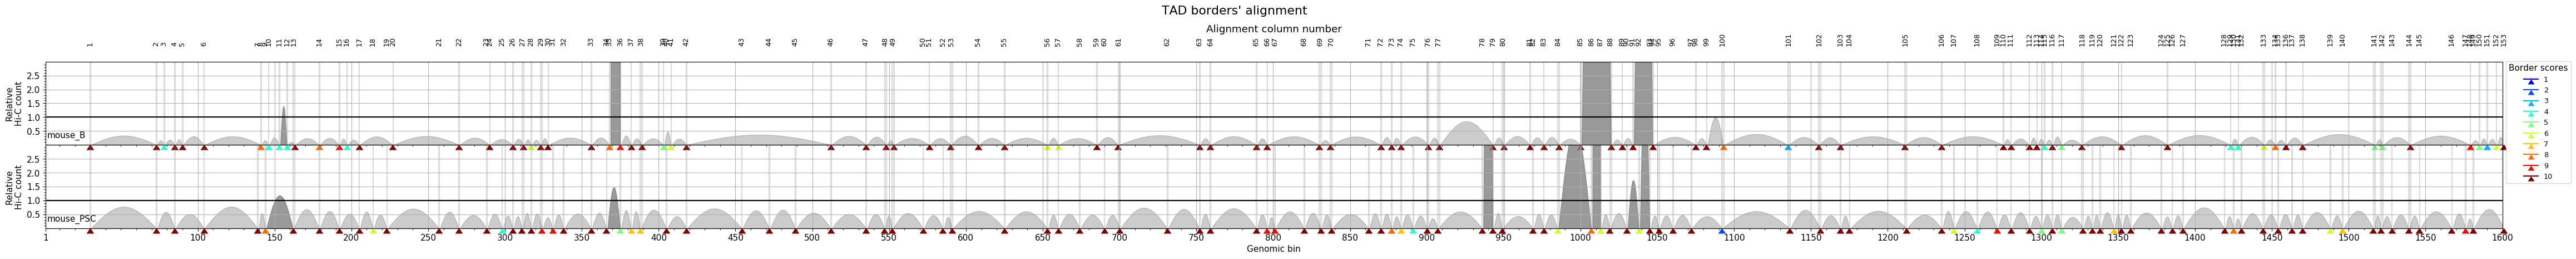

In [12]:
ali.draw(ymax=3)

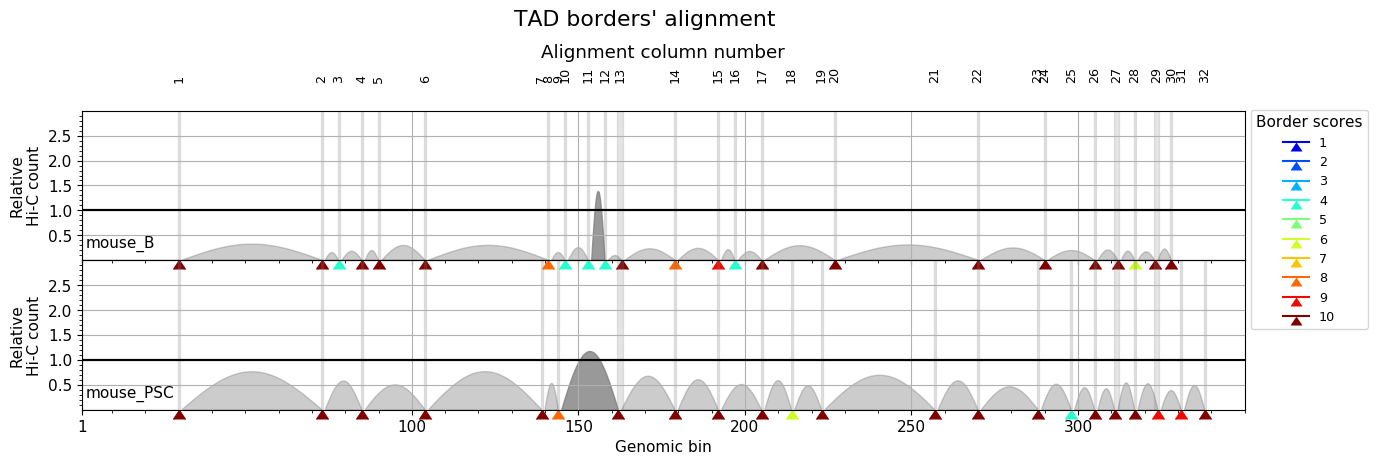

In [14]:
ali.draw(focus=(1, 350), ymax=3)

### Statistical significance of the TAD borders alignments

In order to asses how well two experiments align, or how conserved are the TAD borders between two experiments, we can compare the overlap between our experiments with the overlap of simulated random distributions of TAD borders. 

In [15]:
ali, stats = crm.align_experiments(['mouse_B', 'mouse_PSC'], randomize=True)

In [16]:
print ali

Alignment shown in 100 Kb (2 experiments) (scores: 0 1 2 3 4 5 6 7 8 9 10)
  mouse_B:|    30|    73|    78|    85|    90|   104| ---- |   141| ---- |   146|   153|   158|   163|   179|   192|   197|   205| ---- | ---- |   227| ---- |   270| ---- |   290| ---- |   305|   312|   317|   323|   328| ---- | ---- |   356| ---- |   368|   375|   382|   389|   403| ---- |   408|   418| ---- | ---- | ---- |   512|   535|   548|   553| ---- |   576| ---- |   590|   608|   625|   653|   660| ---- |   685| ---- |   699| ---- |   752|   759|   789|   796| ---- | ---- |   830|   837| ---- |   870|   877|   883| ---- |   901|   908| ---- |   943|   950|   967| ---- |   976|   986|  1000| ---- | ---- |  1020|  1027| ---- |  1034| ---- | ---- |  1047| ---- | ---- | ---- |  1075|  1082|  1093|  1135|  1155|  1169| ---- |  1211|  1235| ---- | ---- | ---- |  1275|  1280|  1292|  1297| ---- |  1302|  1307|  1313|  1326| ---- | ---- | ---- |  1352| ---- | ---- |  1382| ---- | ---- | ---- |  1423| ---- |  14

This analysis returns an alignment score between 0 and 1 (0: no match, 1: all borders aligned), a p-value (usually equal zero), the proportion of borders conserved in the second experiment, and the proportion of borders conserved in the first experiment:

In [17]:
stats

(0.3202614379084967, 0.0, 0.7604166666666666, 0.8050847457627118)

In [18]:
print 'Alignment score: %.3f, p-value: %.4f\n  proportion of borders of T0 found in T60: %.3f, of T60 in T0 %.3f' % stats

Alignment score: 0.320, p-value: 0.0000
  proportion of borders of T0 found in T60: 0.760, of T60 in T0 0.805


## Save Chromosome object (with TAD definition)

In [34]:
crm.save_chromosome('results/fragment/chr3.tdb')

## Extra: choosing the best resolution to call TAD borders

TopDom and the methodology based on insulation score are relatively fast computationally and allow to call TAD borders at very high resolution. **However** being able to call TAD borders at high resolution does not mean that we should do it. **As the resolution increases, so does the noise**.

In order to assess which is the best resolution in order to call TAD borders, a good strategy is to test the consistency of several resolutions.

In the example below, we use the methodology based on the insulation score as it is the fastest (tadbit strategy is almost not usable bellow 20 kb). We compare the number of TAD borders that are shared (plus-minus one bin) between the two replicates (iPS and B cells).

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_bam
from pytadbit.tadbit import insulation_score, insulation_to_borders

In [2]:
base_path = 'results/fragment/{0}_both/03_filtering/valid_reads12_{0}.bam'
cel1 = 'mouse_B'
cel2 = 'mouse_PSC'
borders = {}
resos = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 150000, 200000]

In [ ]:
for c in ['chr%d' % cs for cs in range(1, 20)] + ['chrX']:
    borders[c] = {}
    for reso in resos:
        hic_data1 = load_hic_data_from_bam(base_path.format(cel1),
                                           resolution=reso,
                                           region=c,
                                           ncpus=8, verbose=False)
        hic_data2 = load_hic_data_from_bam(base_path.format(cel2),
                                           resolution=reso,
                                           region=c,
                                           ncpus=8, verbose=False)
        hic_data1.normalize_hic(silent=True)
        hic_data1.normalize_expected()
        hic_data2.normalize_hic(silent=True)
        hic_data2.normalize_expected()
        wsize = (1, max(2, 500000 / reso))
        delta = max(1, 100000 / reso)
        insc1, delta1 = insulation_score(hic_data1, [wsize], resolution=100000, normalize=True, delta=delta)
        insc2, delta2 = insulation_score(hic_data2, [wsize], resolution=100000, normalize=True, delta=delta)
        borders1 = insulation_to_borders(insc1[wsize], delta1[wsize], min_strength=0.1)
        borders2 = insulation_to_borders(insc2[wsize], delta2[wsize], min_strength=0.1)
        borders[c][reso] = borders1, borders2

We align TAD borders and keep the proportion of borders aligned between cell types

In [19]:
from pytadbit.alignment import align

In [23]:
scores = {}
props1 = {}
props2 = {}
for c in borders:
    scores[c] = []
    props1[c] = []
    props2[c] = []
    for reso in resos:
        ali = align([[t[0] for t in b] for b in borders[c][reso]], max_dist=1)
        props1[c].append(ali[0][2])
        props2[c].append(ali[0][3])
        scores[c].append(ali[0][1])

We plot the results, as boxplots to group the values of each chromosomes:

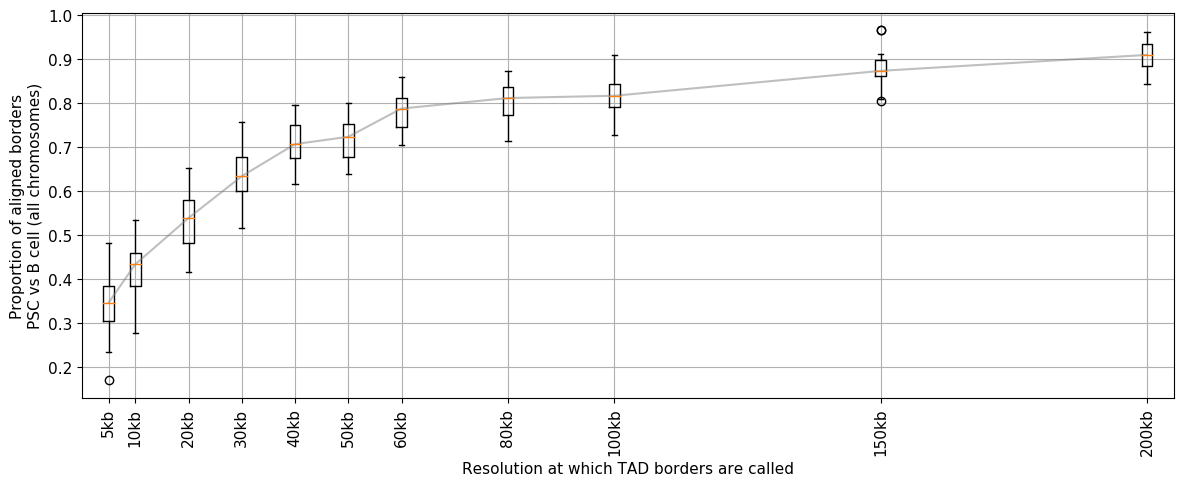

In [24]:
plt.figure(figsize=(12, 5))
bp = plt.boxplot([reduce(lambda x, y: x+ y, 
                 [(props1[c][i], props2[c][i]) for c in props1])
                  for i in range(len(resos))], positions=resos, widths=2000)

plt.plot([sum(m.get_xdata()) / 2 for m in bp['medians']], 
         [m.get_ydata()[0] for m in bp['medians']], color='grey', alpha=0.5)

plt.xlim(0, 205000)
plt.xticks(resos, [str(reso / 1000) + 'kb'  for reso in resos], rotation=90)
plt.ylabel('Proportion of aligned borders\nPSC vs B cell (all chromosomes)')
plt.xlabel('Resolution at which TAD borders are called')
plt.grid()
plt.tight_layout()
plt.show()

In the case of these experiments it seems that looking for TAD borders bellow 50 kb is dangerous, as very few are reproducible. Calling TAD borders at 100 kb resolution might be here a good idea.